 ENERGY DATASET ANALYSIS (Hamoye Stage B Quiz test)

In [98]:
# import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# import and preview dataset
df = pd.read_csv("energydata_complete.csv")
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


<AxesSubplot:>

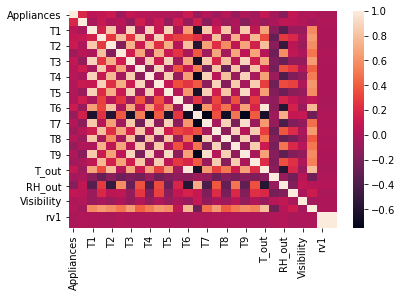

In [4]:
# preview correlation
sns.heatmap(df.corr())

In [47]:
# drop columns not needed for training
df = df.drop(['date', 'lights'], axis=1)

In [48]:
df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [49]:
#normalize dataset to a common scale using the min max scaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# create training and test sets
features = normalised_df.drop(columns=['Appliances'])
target = normalised_df['Appliances']

In [50]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [59]:
# linear regression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(X_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(X_test)
score = inear_model.score(X_test, y_test)
score

0.14890246319303513

In [52]:
# MAE Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.05

In [53]:
#  Residual Sum of Squares.py
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

45.348

In [63]:
# Root mean squared error
rms = mean_squared_error(y_test, predicted_values)
round(rms, 3)

0.008

In [25]:
# MAE Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.05

In [26]:
#   R-Squared.py
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.149

In [79]:
#  Comparing the Effects of regularisation.py
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(linear_model, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_model, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_model, X_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [99]:
final_weights.min

<bound method DataFrame.min of        Features  Linear_Model_Weight  Ridge_Weight  Lasso_weight
0          RH_2            -0.456698     -0.411071     -0.000000
1         T_out            -0.321860     -0.262172      0.000000
2            T2            -0.236178     -0.201397      0.000000
3            T9            -0.189941     -0.188916     -0.000000
4          RH_8            -0.157595     -0.156830     -0.000110
5        RH_out            -0.077671     -0.054724     -0.049557
6          RH_7            -0.044614     -0.045977     -0.000000
7          RH_9            -0.039800     -0.041367     -0.000000
8            T5            -0.015657     -0.019853     -0.000000
9            T1            -0.003281     -0.018406      0.000000
10          rv1             0.000770      0.000748     -0.000000
11          rv2             0.000770      0.000748     -0.000000
12  Press_mm_hg             0.006839      0.006584     -0.000000
13           T7             0.010319      0.010098     -0.0

In [71]:
# Ridge Regression Model
ridge_model = Ridge(alpha=0.4)
#fit the model to the training dataset
ridge_model.fit(X_train, y_train)
#obtain predictions
r_predicted_values = linear_model.predict(X_test)
print(ridge_model.score(X_test, y_test))


0.14852493545092593


In [72]:
# Root mean squared error
rmse_ridge = mean_squared_error(y_test, r_predicted_values)
round(rmse_ridge, 3)

0.008

In [73]:
# Lasso Regression Model
lasso_model = Lasso(alpha=0.001)
#fit the model to the training dataset
lasso_model.fit(X_train, y_train)
#obtain predictions
l_predicted_values = linear_model.predict(X_test)
print(lasso_model.score(X_test, y_test))

0.026800880567125818


In [86]:
# Root mean squared error
rms = mean_squared_error(y_test, l_predicted_values)
round(rms, 3)

0.008

In [10]:
# Question 12
X_temp = df['T2']
y_temp = df['T6']

In [12]:

x = pd.Series(X_temp).array
x = np.array(x).reshape((-1,1))

y = pd.Series(y_temp).array

In [19]:
# linear regression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x, y)
score = linear_model.score(x, y)
score

0.6418990830855493